<a href="https://colab.research.google.com/github/ongks-useR/united_states_bike_share/blob/main/matplotlib_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python Library

In [1]:
# data analysis
import pandas as pd
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

# colormap of matplotlib
from matplotlib import cm
%matplotlib inline

# Operating System
from glob import glob
from os import path
from pathlib import Path

from functools import reduce

## Explore Data

In [2]:
# current path of working directory for jupyter notebook and CSV files in Google Colab
file_dir = '/content/drive/MyDrive/New York Bike Share'

# getting file names within the directory and sort file name
file_names = glob(path.join(file_dir, '*-citibike-tripdata.csv'))
file_names

['/content/drive/MyDrive/New York Bike Share/201901-citibike-tripdata.csv',
 '/content/drive/MyDrive/New York Bike Share/201902-citibike-tripdata.csv',
 '/content/drive/MyDrive/New York Bike Share/201903-citibike-tripdata.csv',
 '/content/drive/MyDrive/New York Bike Share/201904-citibike-tripdata.csv',
 '/content/drive/MyDrive/New York Bike Share/201905-citibike-tripdata.csv',
 '/content/drive/MyDrive/New York Bike Share/201906-citibike-tripdata.csv',
 '/content/drive/MyDrive/New York Bike Share/201907-citibike-tripdata.csv',
 '/content/drive/MyDrive/New York Bike Share/201908-citibike-tripdata.csv',
 '/content/drive/MyDrive/New York Bike Share/201909-citibike-tripdata.csv',
 '/content/drive/MyDrive/New York Bike Share/201910-citibike-tripdata.csv',
 '/content/drive/MyDrive/New York Bike Share/201911-citibike-tripdata.csv',
 '/content/drive/MyDrive/New York Bike Share/201912-citibike-tripdata.csv']

In [3]:
# quick look into the dataset

pd.read_csv('/content/drive/MyDrive/New York Bike Share/201901-citibike-tripdata.csv', nrows=100).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             100 non-null    int64  
 1   starttime                100 non-null    object 
 2   stoptime                 100 non-null    object 
 3   start station id         100 non-null    int64  
 4   start station name       100 non-null    object 
 5   start station latitude   100 non-null    float64
 6   start station longitude  100 non-null    float64
 7   end station id           100 non-null    int64  
 8   end station name         100 non-null    object 
 9   end station latitude     100 non-null    float64
 10  end station longitude    100 non-null    float64
 11  bikeid                   100 non-null    int64  
 12  usertype                 100 non-null    object 
 13  birth year               100 non-null    int64  
 14  gender                   10

In [4]:
# subset column 1 (starttime) & 12 (usertype) for demo
col_index = [1, 12]
col_names = ['time_start', 'user_type']
col_type = {'user_type': 'category'}

# self defined function to create dataframe
def create_df(f, size = 100_000):

    # create chunks of data frame with 100K per chunk. Result is an iteratable of dataframes
    result = pd.read_csv(f, chunksize=size, usecols=col_index, names=col_names, dtype=col_type, header=0, parse_dates=['time_start'])
    
    # store each dataframe in list
    result = [chunk for chunk in result]

    # merge all dataframes
    result = pd.concat(result, ignore_index=True)

    return result

In [5]:
# apply create_df function to each file in file_names to create list of dataframes

df = [create_df(file) for file in file_names]

In [6]:
# combine list of dataframes

df = pd.concat(df, ignore_index=True)
df.head()

,time_start,user_type
0,2019-01-01 00:01:47.401,Subscriber
1,2019-01-01 00:04:43.736,Subscriber
2,2019-01-01 00:06:03.997,Subscriber
3,2019-01-01 00:07:03.545,Subscriber
4,2019-01-01 00:07:35.945,Subscriber


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20551697 entries, 0 to 20551696
Data columns (total 2 columns):
 #   Column      Dtype         
---  ------      -----         
 0   time_start  datetime64[ns]
 1   user_type   category      
dtypes: category(1), datetime64[ns](1)
memory usage: 176.4 MB


## **Monthly Activity of Bike Sharing by Customer Type**

In [8]:
# preparing data for Subscriber

monthly_subscriber = df.loc[df.user_type == 'Subscriber', ['time_start']].reset_index()
monthly_subscriber = monthly_subscriber.assign(index = 1)
monthly_subscriber = monthly_subscriber.resample('M', on='time_start').sum().rename(columns={'index': 'subscriber'})
monthly_subscriber

,subscriber
time_start,
2019-01-31,927114
2019-02-28,897393
2019-03-31,1221302
2019-04-30,1536661
2019-05-31,1629997
2019-06-30,1752526
2019-07-31,1803055
2019-08-31,1900359
2019-09-30,2010493


In [9]:
# preparing data for Customer

monthly_customer = df.loc[df.user_type == 'Customer', ['time_start']].reset_index()
monthly_customer = monthly_customer.assign(index = 1)
monthly_customer = monthly_customer.resample('M', on='time_start').sum().rename(columns={'index': 'customer'})
monthly_customer

,customer
time_start,
2019-01-31,40173
2019-02-28,46351
2019-03-31,106658
2019-04-30,229433
2019-05-31,294566
2019-06-30,372844
2019-07-31,378009
2019-08-31,443865
2019-09-30,434407


## *Matplotlib Components*

Below are basic components of Matplotlib chart:

1. Figure & Chart
2. Data
3. Color
4. Major Title & Subtitle
5. Axis Label
6. Legend
7. Ticks & Ticklabels
8. Style Sheet

## *1. Figure & Chart*

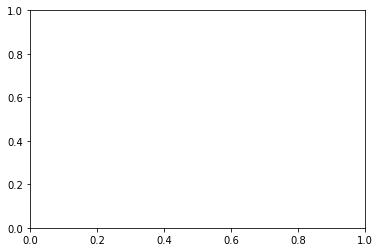

In [10]:
'''
fig >> variable for 'Figure'
ax >> variable for 'Chart'

create a chart (ax) on a A4 paper (figure) with plt.subplots()
default setting: 1 chart per figure

'''

# create figure (fig) & chart (ax)
fig, ax = plt.subplots()

# use .get_height() & get_width() to obatin default height & width of the Figure
h = fig.get_figheight()
w = fig.get_figwidth()

# use .get_xticks() & .get_xticklabels() to obtain default tickmark of the chart
xtick = ax.get_xticks()
xticklabel = ax.get_xticklabels();

In [11]:
# height & width of Figure

f"Figure height: {h} & width: {w}"

'Figure height: 4.0 & width: 6.0'

In [12]:
# xticks of chart

xtick

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [13]:
# xticklabels of chart

[label for label in xticklabel]

[Text(0.0, 0, '0.0'),
 Text(0.2, 0, '0.2'),
 Text(0.4, 0, '0.4'),
 Text(0.6000000000000001, 0, '0.6'),
 Text(0.8, 0, '0.8'),
 Text(1.0, 0, '1.0')]

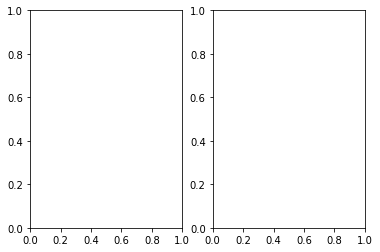

In [14]:
# create 2 charts in one row & 2 columns

fig, ax = plt.subplots(nrows=1, ncols=2)

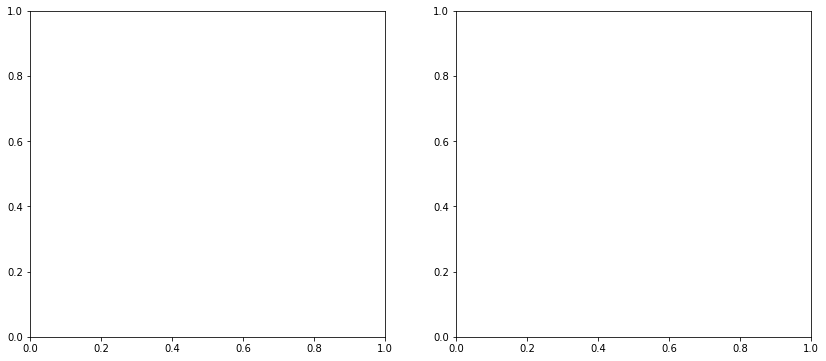

In [15]:
'''
figsize >> adjust size of figure
figsize = (14, 6) >> 14 px for x-axis & 6 px for y-axis

imagine we use larger piece of drawing paper to fit 2 charts

'''

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14, 6))

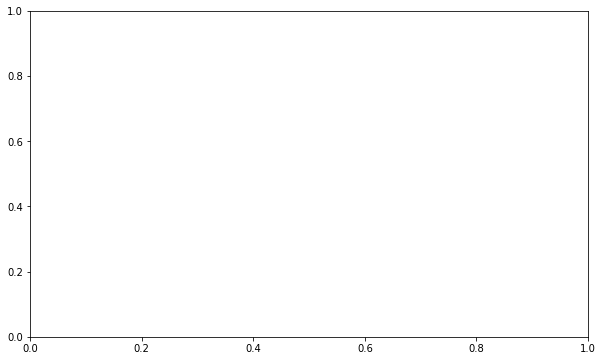

In [16]:
'''
We only focus on drawing ONE professional chart in this demo
Figure & Chart with figsize = (10, 6)

'''

fig, ax = plt.subplots(figsize = (10, 6))

## *2. Data*

We draw the data points on the **Chart**, not **Figure**.

In [17]:
# extract month number
# 1 >> January & 12 >> December

monthly_subscriber.index.month

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='time_start')

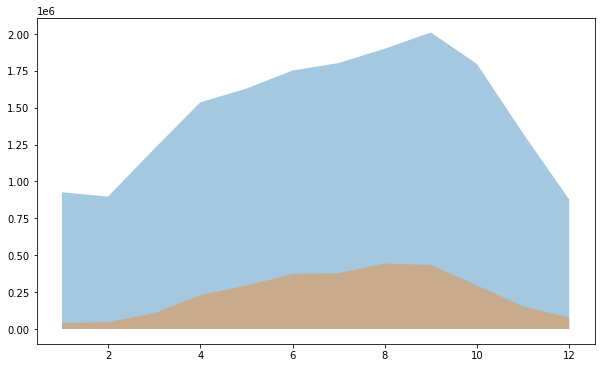

In [18]:
# create figure (fig) & a chart (ax)
fig, ax = plt.subplots(figsize = (10, 6))

'''
put data on chart

.fill_between() >> draw AREA chart
x-axis >> monthly_subscriber.index.month will produce array range from 1 (January) - 12 (December)
alpha >> set transparency level of the area chart; 0: 100% transparent, 1: NOT tranparent at all

'''

ax.fill_between(monthly_subscriber.index.month, monthly_subscriber.subscriber, alpha=0.4)
ax.fill_between(monthly_customer.index.month, monthly_customer.customer, alpha=0.4);

## *3. Color*

We can use Colormap build into Matplotlib.   
Ref: https://matplotlib.org/stable/gallery/color/colormap_reference.html

At the very beginning of the tutorial, we import Color Manager (cm)
`from matplotlib import cm`. We can call `cm.<colormapname>` to select individual color from the colormap.

Example:  
`cm.tab20()` consists of 20 colors provided by Tableau. By calling `cm.tab20(0)`, we get color at index 0 of `tab20` colormap which is `darkblue`.

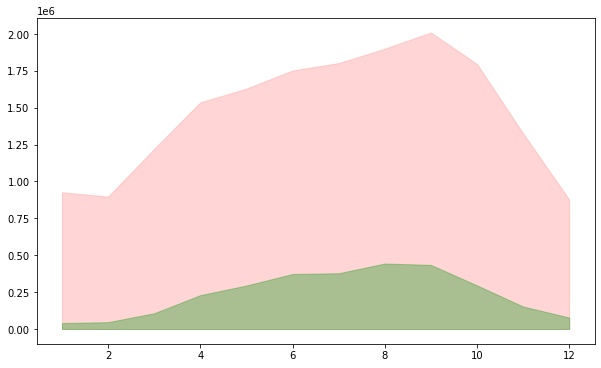

In [19]:
# create figure (fig) & a chart (ax)
fig, ax = plt.subplots(figsize = (10, 6))

'''
paramater 'color' within fill_between, with cm.tab20()
'''
ax.fill_between(monthly_subscriber.index.month, monthly_subscriber.subscriber, 
                alpha=0.4, color=cm.tab20(7))
ax.fill_between(monthly_customer.index.month, monthly_customer.customer, 
                alpha=0.4, color=cm.tab20(4));

## *4. Major Title + Subtitle*

Please note that, **Major Title** is set on **Figure** while **Subtitle** is set on **Chart**.   

`fig.suptitle()` create Major Title;   
`ax.set_title()` create Subtitle.

We can draw multiple charts on a figure, therefore, we can create subtitle for each chart and set a major title for the figure.

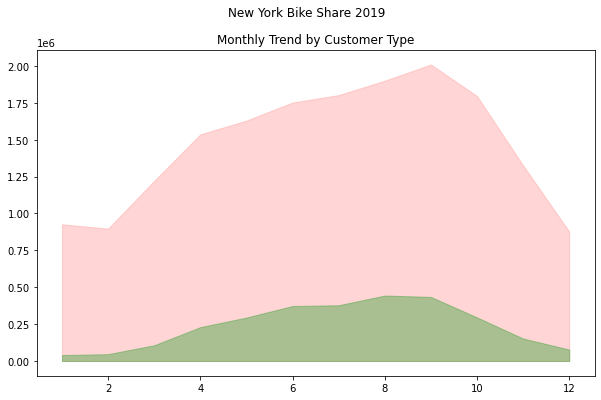

In [20]:
# create figure (fig) & a chart (ax)
fig, ax = plt.subplots(figsize = (10, 6))

ax.fill_between(monthly_subscriber.index.month, monthly_subscriber.subscriber, 
                alpha=0.4, color=cm.tab20(7))
ax.fill_between(monthly_customer.index.month, monthly_customer.customer, 
                alpha=0.4, color=cm.tab20(4))

# create Major Title
fig.suptitle('New York Bike Share 2019')

# create a Subtitle
ax.set_title('Monthly Trend by Customer Type');

## *5. Axis Label*

For x-axis, 'Month' is presented. 1 represents *January* & 12 represents *December*. So, label is not required.

We will put label for y-axis to let users know it is **number of user**.

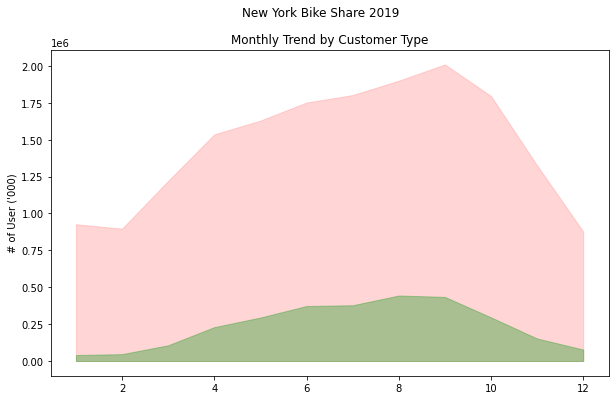

In [31]:
# create figure (fig) & a chart (ax)
fig, ax = plt.subplots(figsize = (10, 6))

ax.fill_between(monthly_subscriber.index.month, monthly_subscriber.subscriber, 
                alpha=0.4, color=cm.tab20(7))
ax.fill_between(monthly_customer.index.month, monthly_customer.customer, 
                alpha=0.4, color=cm.tab20(4))

# create Major Title
fig.suptitle('New York Bike Share 2019')

# create a Subtitle
ax.set_title('Monthly Trend by Customer Type')

# set y-axis label
ax.set_ylabel("# of User ('000)");

## *6. Legend*

At the moment, we see 2 colors on the chart but users might not know which color belong to *Subscriber* & *Customer*.

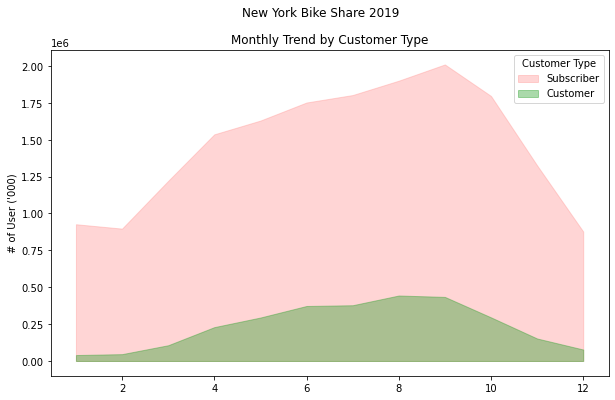

In [22]:
# create figure (fig) & a chart (ax)
fig, ax = plt.subplots(figsize = (10, 6))

ax.fill_between(monthly_subscriber.index.month, monthly_subscriber.subscriber, 
                alpha=0.4, color=cm.tab20(7))
ax.fill_between(monthly_customer.index.month, monthly_customer.customer, 
                alpha=0.4, color=cm.tab20(4))

# create Major Title
fig.suptitle('New York Bike Share 2019')

# create a Subtitle
ax.set_title('Monthly Trend by Customer Type')

# set y-axis label
ax.set_ylabel("# of User ('000)")

# set legend; title & labels
ax.legend(title = 'Customer Type', labels = ['Subscriber', 'Customer']);

## *7. Ticks & Ticklabels*

We have ticks & ticklabels for x & y axis. 

For example: 

x-ticks & x-ticklabels >> year & month from 2019-02 to 2020-02 <br>
y-ticks & y-ticklabels >> -25k to 2.0 million (notice the 1e6)

We can obtain ticks & ticklabels on a chart with: <br>
`.get_xticks()` & `get_xticklabels()` for x-axis <br>
`.get_yticks()` & `get_yticklabels()` for y-axis


In [23]:
'''
ticks for x-axis

NOTE: 
1. These numbers in 'float' format
2. These numbers form the backend of chart; they are NOT presented on the chart.

0 >> origin of the chart
1, 2, 3, .... 14 >> represent month number. 2 >> February, 12 >> December & 14 >> February of 2020

'''

ax.get_xticks()

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.])

In [24]:
'''
ticklabels for x-axis

NOTE: 
1. These numbers in 'string' format
2. These numbers form the front end of chart; they are presented on the chart & we can FORMAT the presentation.

'''

[label for label in ax.get_xticklabels()]

[Text(0.0, 0, '0'),
 Text(2.0, 0, '2'),
 Text(4.0, 0, '4'),
 Text(6.0, 0, '6'),
 Text(8.0, 0, '8'),
 Text(10.0, 0, '10'),
 Text(12.0, 0, '12'),
 Text(14.0, 0, '14')]

In [25]:
'''
ticks for y-axis

NOTE: 
1. These numbers in 'float' format
2. These numbers form the backend of chart; they are NOT presented on the chart.

y-axis start from -25k up to 2 millions

'''

ax.get_yticks()

array([-250000.,       0.,  250000.,  500000.,  750000., 1000000.,
       1250000., 1500000., 1750000., 2000000., 2250000.])

In [26]:
'''
ticklabels for y-axis

NOTE: 
1. These numbers in 'string' format
2. These numbers form the front end of chart; they are presented on the chart & we can FORMAT the presentation.

Matplotlib present the ticklabels as <string> * 1e6.
Example: '1.75' * 1e6 is presented on the chart, which represent 175,000 tick

'''

[label for label in ax.get_yticklabels()]

[Text(0, -250000.0, '−0.25'),
 Text(0, 0.0, '0.00'),
 Text(0, 250000.0, '0.25'),
 Text(0, 500000.0, '0.50'),
 Text(0, 750000.0, '0.75'),
 Text(0, 1000000.0, '1.00'),
 Text(0, 1250000.0, '1.25'),
 Text(0, 1500000.0, '1.50'),
 Text(0, 1750000.0, '1.75'),
 Text(0, 2000000.0, '2.00'),
 Text(0, 2250000.0, '2.25')]

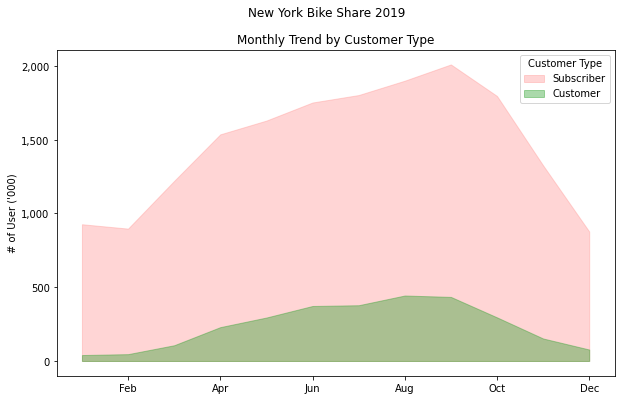

In [27]:
# create figure (fig) & a chart (ax)
fig, ax = plt.subplots(figsize = (10, 6))

ax.fill_between(monthly_subscriber.index.month, monthly_subscriber.subscriber, 
                alpha=0.4, color=cm.tab20(7))
ax.fill_between(monthly_customer.index.month, monthly_customer.customer, 
                alpha=0.4, color=cm.tab20(4))

# create Major Title
fig.suptitle('New York Bike Share 2019')

# create a Subtitle
ax.set_title('Monthly Trend by Customer Type')

# set y-axis label
ax.set_ylabel("# of User ('000)")

# set legend; title & labels
ax.legend(title = 'Customer Type', labels = ['Subscriber', 'Customer'])

'''
set ticks & ticklabels for x-axis

NOTE: must set xticks first then set xticklabels

Only want to display February (ie 2) up to December 2019 (ie 12)
'''
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xticklabels(['Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec'])

'''
set ticks & ticklabels for y-axis

NOTE: must set yticks first then set yticklabels
yticks are [0, 500,000, 1,000,000, 1,500,000, 2,000,000], in 'integer' format
yticklabels are formatted as 'string' >> [0, 500, 1,000, 1,500, 2,000]

REMEMBER!! ticks are actual number & ticklabels are number formatted for presentation.

'''

ax.set_yticks([0, 0.5e6, 1e6, 1.5e6, 2e6])
ax.set_yticklabels([f"{int(num):,}" for num in np.array([0, 0.5e6, 1e6, 1.5e6, 2e6])/1000]);

## *8. Style Sheet*

Style sheets are essentially a *theme* for chart. It improves aesthetic of the chart by applying customized style.   

Add `with plt.style.context(<style sheet name>):` at the beginning of the figure to apply temporary theme for specific figure.

In [28]:
# all style sheets avaialble in Matplotlib

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

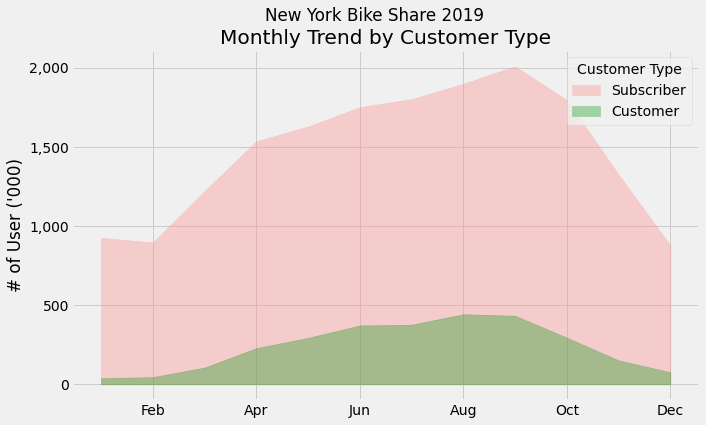

In [29]:
with plt.style.context('fivethirtyeight'):

    # create figure (fig) & a chart (ax)
    fig, ax = plt.subplots(figsize = (10, 6))

    ax.fill_between(monthly_subscriber.index.month, monthly_subscriber.subscriber, 
                    alpha=0.4, color=cm.tab20(7))
    ax.fill_between(monthly_customer.index.month, monthly_customer.customer, 
                    alpha=0.4, color=cm.tab20(4))

    # create Major Title
    fig.suptitle('New York Bike Share 2019')

    # create a Subtitle
    ax.set_title('Monthly Trend by Customer Type')

    # set y-axis label
    ax.set_ylabel("# of User ('000)")

    # set legend; title & labels
    ax.legend(title = 'Customer Type', labels = ['Subscriber', 'Customer'])

    '''
    set ticks & ticklabels for x-axis

    NOTE: must set xticks first then set xticklabels

    Only want to display February (ie 2) up to December 2019 (ie 12)
    '''
    ax.set_xticks([2, 4, 6, 8, 10, 12])
    ax.set_xticklabels(['Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec'])

    '''
    set ticks & ticklabels for y-axis

    NOTE: must set yticks first then set yticklabels
    yticks are [0, 500,000, 1,000,000, 1,500,000, 2,000,000], in 'integer' format
    yticklabels are formatted as 'string' >> [0, 500, 1,000, 1,500, 2,000]

    REMEMBER!! ticks are actual number & ticklabels are number formatted for presentation.

    '''

    ax.set_yticks([0, 0.5e6, 1e6, 1.5e6, 2e6])
    ax.set_yticklabels([f"{int(num):,}" for num in np.array([0, 0.5e6, 1e6, 1.5e6, 2e6])/1000]);

## *Go Extra Miles*

Let's improve the following: *Major Title* & *Subtitle*, *Font*,*Legend* & *axis label*.

We can adjust font size, position, and style of these components.

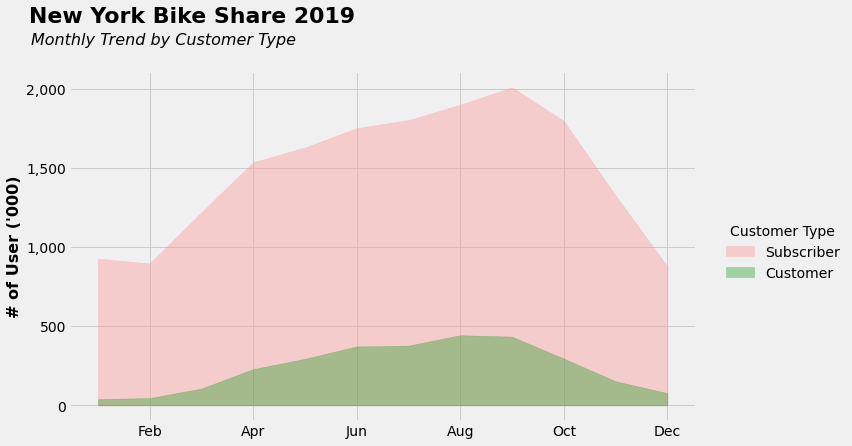

In [30]:
with plt.style.context('fivethirtyeight'):

    # create figure (fig) & a chart (ax)
    fig, ax = plt.subplots(figsize = (10, 6))

    ax.fill_between(monthly_subscriber.index.month, monthly_subscriber.subscriber, 
                    alpha=0.4, color=cm.tab20(7))
    ax.fill_between(monthly_customer.index.month, monthly_customer.customer, 
                    alpha=0.4, color=cm.tab20(4))

    # create Major Title
    fig.suptitle('New York Bike Share 2019', x=0.25, y=1.03, fontsize=22, fontweight='bold')

    # create a Subtitle
    ax.set_title('Monthly Trend by Customer Type', fontdict={'fontsize': 16, 'style': 'italic'}, position = [0.15, 1.06])

    # set y-axis label
    ax.set_ylabel("# of User ('000)", fontdict={'fontsize': 16, 'fontweight': 'bold'})

    '''
    set legend; title & labels
    frameon = False >> remove the frame of legend
    bbox_to_anchor >> moves legend out of the chart window
    
    '''
    ax.legend(title = 'Customer Type', labels = ['Subscriber', 'Customer'], frameon = False, bbox_to_anchor=(1.25, 0.6))

    # set axes ticks & ticklabels
    ax.set_xticks([2, 4, 6, 8, 10, 12])
    ax.set_xticklabels(['Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec'])

    ax.set_yticks([0, 0.5e6, 1e6, 1.5e6, 2e6])
    ax.set_yticklabels([f"{int(num):,}" for num in np.array([0, 0.5e6, 1e6, 1.5e6, 2e6])/1000]);